# HeartAttack Prediction
### 속성 설명
1. Age : 나이
2. Sex : 성별 (1 = 남성, 0 = 여성)
3. cp : 가슴 통증 종류
    - 1: 전형적인 협심증
    - 2: 불규칙적인 협심증
    - 3: 협심증이 아닌 통증
    - 4: 무증상
4. trtbps : 혈압
5. chol : 콜레스트롤 수치
6. fbs : 공복 혈당 (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg : 공복 심전도 (0 = 정상, 1 = , 2)
8. thalachh : 최대 심박수
9. exang : 운동으로 인한 협심증 (1 = 예; 0 = 아니요)
10. output : 0 = 심장마비 확률 적음, 1 = 심장마비 확률 높음
 
(angina/협심증 : 심장의 혈액 순환로가 되는 관상동맥이 좁아져 갑작스럽게 흉부 통증 또는 압박감을 느끼는 상태)

- 역할 분담 (예정)
    - 이예현 : 데이터 가공, 시각화, 주석 작성
    - 정해성 : 모델 학습, 예측, 평가

- 출처 : https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

### 데이터 시각화
---


In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import copy

#.csv 파일 읽기, 필요없는 열 버리기
origin_df = pd.read_csv('./heart.csv')
origin_df.drop(['oldpeak', 'slp', 'caa', 'restecg', 'thall'], axis = 1, inplace = True)
origin_df

,age,sex,cp,trtbps,chol,fbs,thalachh,exng,output
0,63,1,3,145,233,1,150,0,1
1,37,1,2,130,250,0,187,0,1
2,41,0,1,130,204,0,172,0,1
3,56,1,1,120,236,0,178,0,1
4,57,0,0,120,354,0,163,1,1
...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,123,1,0
299,45,1,3,110,264,0,132,0,0
300,68,1,0,144,193,1,141,0,0
301,57,1,0,130,131,0,115,1,0


In [2]:
#각 열들의 이름 바꾸기
origin_df.rename(
    columns = {
        'age' : 'Age',
        'sex' : 'Sex',
        'cp' : 'PainType',
        'trtbps' : 'BloodPressure',
        'chol' : 'Cholestoral',
        'fbs' : 'BloodSugar',
        'thalachh' : 'MaxHeartRate',
        'exng' : 'ExerciseInduced',
        'output' : 'Result',
    },
    inplace = True
)
origin_df

,Age,Sex,PainType,BloodPressure,Cholestoral,BloodSugar,MaxHeartRate,ExerciseInduced,Result
0,63,1,3,145,233,1,150,0,1
1,37,1,2,130,250,0,187,0,1
2,41,0,1,130,204,0,172,0,1
3,56,1,1,120,236,0,178,0,1
4,57,0,0,120,354,0,163,1,1
...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,123,1,0
299,45,1,3,110,264,0,132,0,0
300,68,1,0,144,193,1,141,0,0
301,57,1,0,130,131,0,115,1,0


In [35]:
#원본 데이터프레임 복사
onehot_df = copy.deepcopy(origin_df)
#One-Hot 방식으로 분리시킬 열 모음
atomic_col_names = ('Sex', 'PainType', 'BloodSugar', 'ExerciseInduced')
#각각의 후보 값 개수 모음
atomic_col_counts = (2, 4, 2, 2)
#각 열에 대한 처리
for index in range(len(atomic_col_names)):
    #각각의 값에 대한 처리, 성별의 경우 i = 0, 1, PainType의 경우 i = 0, 1, 2, 3
    for i in range(atomic_col_counts[index]):
        #변수 정의
        newname = f'{atomic_col_names[index]}={i}'
        temp_series = origin_df[atomic_col_names[index]]
        #각 열에 새로운 시리즈 생성
        onehot_df[newname] = pd.Series(origin_df.index)
        for j in temp_series.index:
            #One-Hot 인코딩
            onehot_df[newname][j] = int(temp_series[j] == i)
onehot_df

,Age,Sex,PainType,BloodPressure,Cholestoral,BloodSugar,MaxHeartRate,ExerciseInduced,Result,Sex=0,Sex=1,PainType=0,PainType=1,PainType=2,PainType=3,BloodSugar=0,BloodSugar=1,ExerciseInduced=0,ExerciseInduced=1
0,63,1,3,145,233,1,150,0,1,0,1,0,0,0,1,0,1,1,0
1,37,1,2,130,250,0,187,0,1,0,1,0,0,1,0,1,0,1,0
2,41,0,1,130,204,0,172,0,1,1,0,0,1,0,0,1,0,1,0
3,56,1,1,120,236,0,178,0,1,0,1,0,1,0,0,1,0,1,0
4,57,0,0,120,354,0,163,1,1,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,123,1,0,1,0,1,0,0,0,1,0,0,1
299,45,1,3,110,264,0,132,0,0,0,1,0,0,0,1,1,0,1,0
300,68,1,0,144,193,1,141,0,0,0,1,1,0,0,0,0,1,1,0
301,57,1,0,130,131,0,115,1,0,0,1,1,0,0,0,1,0,0,1


In [4]:
#심장마비 가능성이 낮은 사람들 모음
fine_df = onehot_df[medi_df['Result'] == 0]
#심장마비 가능성이 높은 사람들 모음
dan_df = onehot_df[medi_df['Result'] == 1]
#이미 One-Hot을 적용한 열들은 제외할 것 (더이상 의미가 없음)
excluded_names = ['Sex', 'PainType', 'BloodSugar', 'ExerciseInduced', 'Result']

In [36]:
sums = dict()
mean_df = pd.DataFrame()
#제외된 열들을 제외한 열들에 대해서만 반복
for colname in fine_df.drop(excluded_names, axis = 1).columns:
    #One-Hot으로 생성된 열일 경우: 가중치에 대해 각각의 비율 구하기
    if colname[:-2] in atomic_col_names:
        #이후의 정규화를 위한 딕셔너리 값 초기화
        if not(colname[:-2] in sums.keys()): sums[colname[:-2]] = [0, 0]
        #성비 불균형과 같은 문제[*]를 해소하기 위한 가중치 부여
        mean_df[colname] = pd.Series([
            fine_df[colname].sum() / onehot_df[colname].sum(),
            dan_df[colname].sum() / onehot_df[colname].sum(),
        ])
        #정규화를 위한 각 기준 열에 대한 총합 구하기
        sums[colname[:-2]][0] += mean_df[colname][0]
        sums[colname[:-2]][1] += mean_df[colname][1]
    #일반적인 경우: 평균값 구하기
    else:
        mean_df[colname] = pd.Series([
            fine_df[colname].mean(),
            dan_df[colname].mean(),
        ])
#정규화
for colname in mean_df.columns:
    if colname[:-2] in sums.keys(): mean_df[colname] = mean_df[colname] / sums[colname[:-2]] * 100
#인덱스 이름 재정의
mean_df.rename(
    index = {
        0 : 'Fine',
        1 : 'Dangerous',
    },
    inplace = True
)
mean_df

,Age,BloodPressure,Cholestoral,MaxHeartRate,Sex=0,Sex=1,PainType=0,PainType=1,PainType=2,PainType=3,BloodSugar=0,BloodSugar=1,ExerciseInduced=0,ExerciseInduced=1
Fine,56.601449,134.398551,251.086957,139.101449,31.221719,68.778281,51.269930,12.689308,14.585411,21.455351,47.907489,52.092511,28.361519,71.638481
Dangerous,52.496970,129.303030,242.230303,158.466667,62.537764,37.462236,10.564752,31.764688,30.722785,26.947774,51.850049,48.149951,74.976000,25.024000


연속적인 열들 중 가장 눈여겨봐야 할 것은 MaxHeartRate 열로, 심장마비가 괜찮은 사람들은 평균적으로 최대 심박수가 139였던 반면에 심장마비 위험도가 높은 사람들은 평균 최대 심박수가 158이었으므로 두 값 사이에 유의미한 상관관계가 있다는 것을 알 수 있습니다. 후에 구현할 인공지능도 마찬가지로 이러한 점을 학습하게 될 것입니다.

<hr />
[*]: 만약 여성이 200명이고 남성이 4000명, 심장마비에 위험한 여성이 140명이고 위험한 남성이 1300명, 위험하지 않은 여성과 남성이 각각 60명, 2700명이라면, 단순히 그에 대한 비율을 구할 경우 남성이 무조건적으로 위험하면서 위험하지 않다는 이상한 결론이 나오므로, 이를 해결하기 위해 140과 60을, 여성의 총 명수 200으로 나누고, 남성의 각 수 1300과 2700을 3000으로 나눈다면 절대적인 자료 개수 차이에 의한 정보 왜곡을 없애면서 동시에 해당 통계의 신뢰성과 의미를 향상시킬 수 있습니다.
<br /><br />
<i><b>가중치 부여 이전</b></i>
<br />
위험한 사람 -- 여 : 남 = 140 : 1300 = 9.72% : 90.28%
<br />
위험하지 않은 사람 -- 여 : 남 = 60 : 2700 = 2.17% : 97.83%
<br /><br />
<i><b>가중치 부여 이후</b></i>
<br />
위험한 사람 -- 여 : 남 = 70 : 32.5 = 68.29% : 31.71%
<br />
위험하지 않은 사람 -- 여 : 남 = 30 : 67.5 = 30.77% : 69.23%
<hr />

In [39]:
#One-Hot으로 변환되는 열들
atomic_df = mean_df.drop(['Age', 'BloodPressure', 'Cholestoral', 'MaxHeartRate'], axis = 1)
#One-Hot에 영향받지 않는, 상대적으로 연속적인 열들
continuous_df = mean_df.drop([
    'Sex=0', 'Sex=1', 'PainType=0', 'PainType=1', 'PainType=2', 'PainType=3', 'BloodSugar=0', 'BloodSugar=1',
    'ExerciseInduced=0', 'ExerciseInduced=1',
], axis = 1)

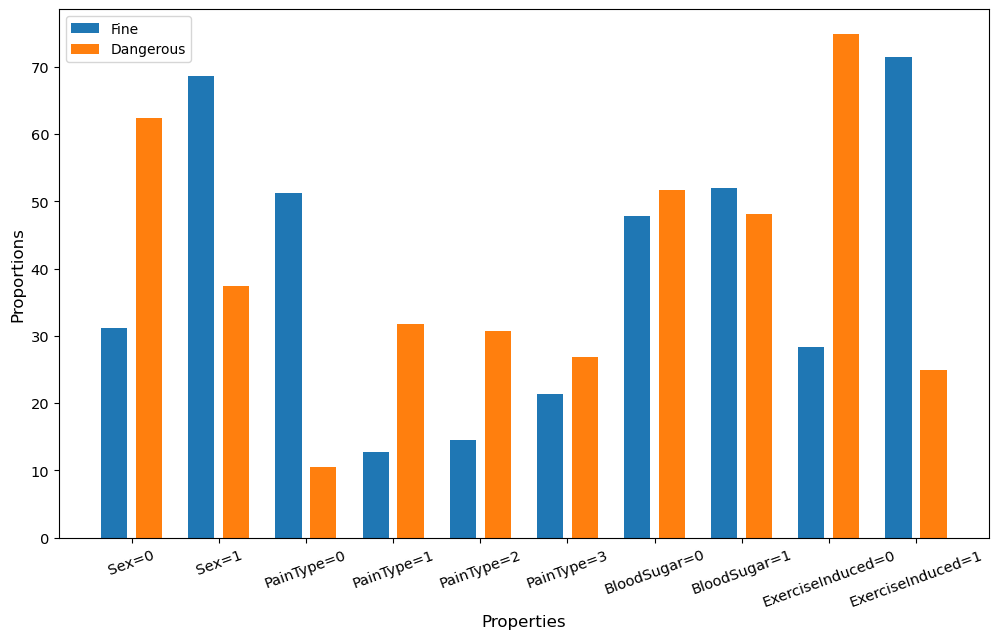

In [25]:
plt.figure(figsize = (12, 7), dpi = 100)

#x축, y축 값 설정
plt.xticks(range(0, 10, 1), atomic_df.columns, size = 10.5, rotation = 20)
plt.yticks(np.arange(0, 100.19, 10.02), range(0, 100, 10), size = 10.5)

#두 가지 막대 그래프 그리기
axis = np.arange(len(atomic_df.columns))
plt.bar(axis - 0.2, atomic_df.loc['Fine'], width = 0.3, label = 'Fine')
plt.bar(axis + 0.2, atomic_df.loc['Dangerous'], width = 0.3, label = 'Dangerous')

#x축, y축 레이블 설정
plt.xlabel('Properties', fontsize = 12)
plt.ylabel('Proportions', fontsize = 12)

#plt.grid(True)
plt.legend()
plt.show()

In [12]:
continuous_df

,Age,BloodPressure,Cholestoral,MaxHeartRate
0,63,145,233,150
1,37,130,250,187
2,41,130,204,172
3,56,120,236,178
4,57,120,354,163
...,...,...,...,...
298,57,140,241,123
299,45,110,264,132
300,68,144,193,141
301,57,130,131,115


### 머신러닝 모델 학습
---

In [2]:
import sklearn